<a href="https://colab.research.google.com/github/Sedighe-Raeisi/Analysis-of-value-of-bank-customers/blob/main/Value_Bank_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Datas Into Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! cp '/content/TASK_DATASCIENCE_TRAN.CSV' -r /content/drive/MyDrive/MachineLearing/Negah_Data

cp: cannot stat '/content/TASK_DATASCIENCE_TRAN.CSV': No such file or directory


In [ ]:
!cp '/content/TASK_DATASCIENCE.CSV' -r /content/drive/MyDrive/MachineLearing/Negah_Data

cp: cannot stat '/content/TASK_DATASCIENCE.CSV': No such file or directory


#Data's apearance 

In [ ]:
path1='/content/drive/MyDrive/MachineLearing/Negah_Data/TASK_DATASCIENCE.CSV'
path2='/content/drive/MyDrive/MachineLearing/Negah_Data/TASK_DATASCIENCE_TRAN.CSV'

In [ ]:
import pandas as pd
import numpy as np
import math as mt


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
f_Rem=pd.read_csv(path1)
# f_Rem.head()

In [ ]:
f_Tran=pd.read_csv(path2)
# f_Tran.head()

In [ ]:
# f_Rem.info()
f_Rem.isnull().sum()

SYM_RUN_DATE     0
ACC_NO           1
OPEN_DATE        1
ACCT_STATUS      1
ACC_TYPE         1
BAL_RLS         78
dtype: int64

In [ ]:
f_Rem[f_Rem['OPEN_DATE'].isna()]

,SYM_RUN_DATE,ACC_NO,OPEN_DATE,ACCT_STATUS,ACC_TYPE,BAL_RLS
76079,2,NaN,NaN,NaN,NaN,NaN


In [ ]:
f_Rem.dropna(inplace=True)

In [ ]:
f_Rem.isnull().sum()

SYM_RUN_DATE    0
ACC_NO          0
OPEN_DATE       0
ACCT_STATUS     0
ACC_TYPE        0
BAL_RLS         0
dtype: int64

In [ ]:
# f_Tran.info()
f_Tran.isnull().sum()

ACC_NO       0
TRAN_AMT     0
TRAN_CAT     0
TRAN_DATE    0
dtype: int64

In [ ]:
# max(set(f_Rem['SYM_RUN_DATE']))

In [ ]:
# len(set(f_Rem['SYM_RUN_DATE']))

In [ ]:
# 90-78

# Introducing Features:

Feature 1: Tran Count (number of transiton per each account)

In [ ]:
# Featur 1: Number of TRAN_AMT per acountNo
Tran_Count=pd.DataFrame(f_Tran.groupby(by='ACC_NO')['TRAN_AMT'].count()).sort_values(by='TRAN_AMT')
Tran_Count.rename(columns={"TRAN_AMT":"Tran_Count"},inplace=True)
Tran_Count.reset_index(inplace=True)

In [ ]:
# we Scale the Tran_Count feature: 
epsilon=1e-30 # to ignor error when using Log function in the next line:
Tran_Count['Tran_Count_SC']=Tran_Count['Tran_Count'].apply(lambda x: -1*mt.log(x+epsilon))
Tran_Count['Tran_Count_SC']=(Tran_Count['Tran_Count_SC']-Tran_Count['Tran_Count_SC'].min())/(Tran_Count['Tran_Count_SC'].max()-Tran_Count['Tran_Count_SC'].min())



In [ ]:
# plt.hist(Tran_Count['Tran_Count_SC'],bins=50);

Feature 2:  average of transition amount per each account

In [ ]:
#Feature 2: Mean absoloit of TRAN_AMT 
Tran_Mean=pd.DataFrame(f_Tran.groupby(by='ACC_NO')['TRAN_AMT'].mean()).sort_values(by='TRAN_AMT')
Tran_Mean.rename(columns={"TRAN_AMT":"Tran_Mean"},inplace=True)
Tran_Mean.reset_index(inplace=True)

In [ ]:
epsilon=1e-30 # to ignor error when using Log function in the next line:
Tran_Mean['Tran_Mean_SC']=Tran_Mean['Tran_Mean'].apply(lambda x: -1*mt.log(x+epsilon))
Tran_Mean['Tran_Mean_SC']=(Tran_Mean['Tran_Mean_SC']-Tran_Mean['Tran_Mean_SC'].min())/(Tran_Mean['Tran_Mean_SC'].max()-Tran_Mean['Tran_Mean_SC'].min())



In [ ]:
# plt.figure(figsize=[5,5])
# plt.hist(Tran_Mean['Tran_Mean_SC']);

Feature 3:  variance of transition amount per each account

In [ ]:
#feature 3: varianc of absolout of TRAN_AMT 
Tran_Var=pd.DataFrame(f_Tran.groupby(by='ACC_NO')['TRAN_AMT'].var(ddof=0)).sort_values(by='TRAN_AMT')
Tran_Var.rename(columns={"TRAN_AMT":"Tran_Var"},inplace=True)
Tran_Var.reset_index(inplace=True)

In [ ]:
epsilon=1e-30 # to ignor error when using Log function in the next line:
Tran_Var['Tran_Var_SC']=Tran_Var['Tran_Var'].apply(lambda x: -1*mt.log(x+epsilon))
Tran_Var['Tran_Var_SC']=(Tran_Var['Tran_Var_SC']-Tran_Var['Tran_Var_SC'].min())/(Tran_Var['Tran_Var_SC'].max()-Tran_Var['Tran_Var_SC'].min())

In [ ]:
# plt.figure(figsize=[5,5])
# plt.boxplot(Tran_Var['Tran_Var_SC']);

In [ ]:
#close accounts (some of them have money):
# set(f1['BAL_RLS'][f1['ACCT_STATUS']=='C'])

Feature 4:  average of account money at the end of day for each account

In [ ]:
# Feature 4: Mean of account at the end of each day:
Rem_Mean=pd.DataFrame(f_Rem.groupby(by='ACC_NO')['BAL_RLS'].mean()).sort_values(by='BAL_RLS')
Rem_Mean.rename(columns={"BAL_RLS":"Rem_Mean"},inplace=True)
Rem_Mean.reset_index(inplace=True)

In [ ]:
epsilon=1e-30 # to ignor error when using Log function in the next line:
Rem_Mean['Rem_Mean_SC']=Rem_Mean['Rem_Mean'].apply(lambda x: -1*mt.log(x+epsilon))
Rem_Mean['Rem_Mean_SC']=(Rem_Mean['Rem_Mean_SC']-Rem_Mean['Rem_Mean_SC'].min())/(Rem_Mean['Rem_Mean_SC'].max()-Rem_Mean['Rem_Mean_SC'].min())



In [ ]:
# sn.histplot(data=Rem_Mean['Rem_Mean_SC'])

Feature 5:  variance of account money at the end of day for each account

In [ ]:
# Feature 5: Variance of Acc_Rem at the end of day

In [ ]:
# Feature 4: Mean of account at the end of each day:
Rem_Var=pd.DataFrame(f_Rem.groupby(by='ACC_NO')['BAL_RLS'].var(ddof=0)).sort_values(by='BAL_RLS')
Rem_Var.rename(columns={"BAL_RLS":"Rem_Var"},inplace=True)
Rem_Var.reset_index(inplace=True)

In [ ]:
epsilon=1e-30 # to ignor error when using Log function in the next line:
Rem_Var['Rem_Var_SC']=Rem_Var['Rem_Var'].apply(lambda x: -1*mt.log(x+epsilon))
Rem_Var['Rem_Var_SC']=(Rem_Var['Rem_Var_SC']-Rem_Var['Rem_Var_SC'].min())/(Rem_Var['Rem_Var_SC'].max()-Rem_Var['Rem_Var_SC'].min())

In [ ]:
# sn.histplot(data=Rem_Var['Rem_Var_SC'])



## Convert Gregorian time of "SYM_RUN_DATE" to jalali

In [ ]:
!pip install jdatetime

In [ ]:
import jdatetime 

In [ ]:
a=f_Rem['SYM_RUN_DATE'].min().split('/')

In [ ]:
f_Rem['Day_RUN_DATE']=f_Rem['SYM_RUN_DATE'].apply(lambda x: jdatetime.date.fromgregorian(day=int(x.split('/')[0]),month=int(x.split('/')[1]),year=int(x.split('/')[2])).strftime("%Y/%m/%d"))


## Feature 6:





####Gathering information

Feature 6:  Total active days for each account

In [ ]:
#Active Time Length of accounts befor the min time of dataset (min_t):

In [ ]:
 from jdatetime import datetime


In [ ]:
min_t=[]
for x in f_Rem['Day_RUN_DATE'].min().split('/'):
  min_t.append(int(x))
min_t

[1399, 8, 1]

In [ ]:
#This gives us the time period between the opening of acc and the first date in dataset:(we used the heaviside function to remove the negative time periods)
active_length_before=pd.DataFrame()
active_length_before['before']=f_Rem['Day_RUN_DATE'].apply(lambda x:np.heaviside(((datetime(int(x.split('/')[0]),int(x.split('/')[1]),int(x.split('/')[2]))-datetime(min_t[0],min_t[1],min_t[2])).days),0)*((datetime(int(x.split('/')[0]),int(x.split('/')[1]),int(x.split('/')[2]))-datetime(min_t[0],min_t[1],min_t[2])).days))

In [ ]:
# This gives us the active time during the period of dataset:
AC_During=pd.DataFrame(pd.crosstab(f_Rem['ACC_NO'],f_Rem['ACCT_STATUS']))
AC_During.drop(columns='C',inplace=True)
AC_During.reset_index(inplace=True)

In [ ]:
total_active=pd.concat([active_length_before,AC_During],axis=1,join="inner")

In [ ]:
total_active['total_active']=total_active.apply(lambda x: int(x['before'])+x['A'], axis=1)

In [ ]:
total_active.drop(columns=['before','A'], inplace=True)

In [ ]:
del [active_length_before,AC_During]

In [ ]:
# plt.boxplot(total_active['total_active']);

In [ ]:
total_active['total_active_SC']=(total_active['total_active']-total_active['total_active'].min())/(total_active['total_active'].max()-total_active['total_active'].min())

# Make a united dataframe from all features by concating them:

In [ ]:
# result=pd.concat([Tran_Count,Tran_Mean,Tran_Var,Rem_Mean,total_active],axis=1, join='outer')

In [ ]:
result=pd.DataFrame()
result=Tran_Count.copy()
for x in [Tran_Mean,Tran_Var,Rem_Mean,total_active,Rem_Var]:
  result=result.merge(x)

In [ ]:
result.columns

Index(['ACC_NO', 'Tran_Count', 'Tran_Count_SC', 'Tran_Mean', 'Tran_Mean_SC',
       'Tran_Var', 'Tran_Var_SC', 'Rem_Mean', 'Rem_Mean_SC', 'total_active',
       'total_active_SC', 'Rem_Var', 'Rem_Var_SC'],
      dtype='object')

In [ ]:
Path='/content/drive/MyDrive/MachineLearing/Negah_Data/Negah_features_1.csv'
result.to_csv(Path)

In [ ]:
result=pd.read_csv(Path)

# Now we have features, Lets consider it visualy.

In [ ]:
result.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
result.columns

Index(['ACC_NO', 'Tran_Count', 'Tran_Count_SC', 'Tran_Mean', 'Tran_Mean_SC',
       'Tran_Var', 'Tran_Var_SC', 'Rem_Mean', 'Rem_Mean_SC', 'total_active',
       'total_active_SC', 'Rem_Var', 'Rem_Var_SC'],
      dtype='object')

In [ ]:
sn.set(rc={'figure.figsize':(13,13)})

In [ ]:
willing_col=['Tran_Count_SC','Tran_Mean_SC','Tran_Var_SC','Rem_Mean_SC','Rem_Var_SC','total_active']

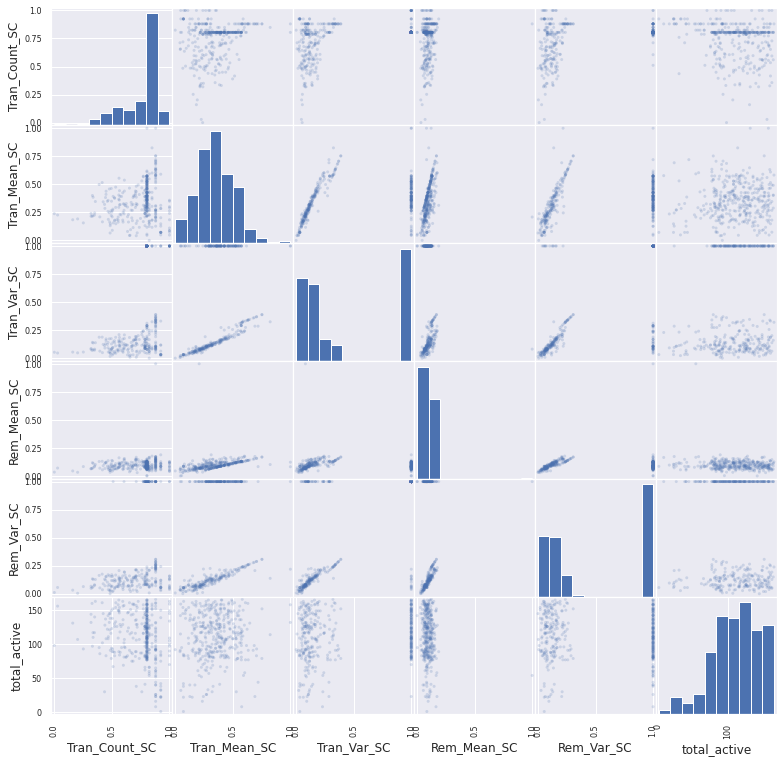

In [ ]:
pd.plotting.scatter_matrix(result[willing_col], alpha=0.2);

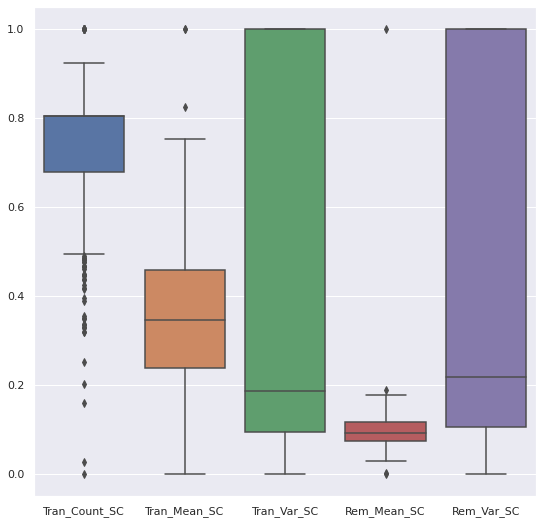

In [ ]:
sn.set(rc={'figure.figsize':(9,9)})
sn.boxplot(data=result[willing_col].drop(columns='total_active'));

#Lets drop outliers:



###Outliers of Rem_Mean:

In [ ]:
# we make standard score from Rem_MEan:
result['Rem_Mean_SC_Z']=(result['Rem_Mean_SC']-result['Rem_Mean_SC'].mean())/result['Rem_Mean_SC'].std()

In [ ]:
result[['ACC_NO','Rem_Mean_SC_Z']] [result['Rem_Mean_SC_Z']>3]

,ACC_NO,Rem_Mean_SC_Z
40,16656457,16.27837


In [ ]:
# plt.figure(figsize=[5,5])
# plt.boxplot(result['Rem_Mean_SC'][result['Rem_Mean_SC_Z']<3]);

##Outlier of Tran_Mean:

In [ ]:
# we make standard score from Rem_Var:
result['Tran_Mean_SC_Z']=(result['Tran_Mean_SC']-result['Tran_Mean_SC'].mean())/result['Tran_Mean_SC'].std()

In [ ]:
result[['ACC_NO','Tran_Mean_SC_Z']] [result['Tran_Mean_SC_Z']>3]

,ACC_NO,Tran_Mean_SC_Z
31,15126763,4.027784
209,15348947,4.027784


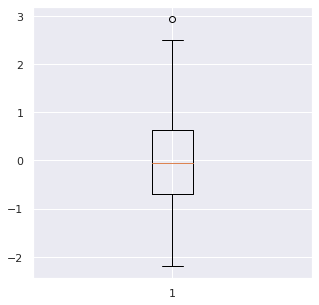

In [ ]:
plt.figure(figsize=[5,5])
plt.boxplot(result['Tran_Mean_SC_Z'][result['Tran_Mean_SC_Z']<3]);

 
 
##Now we drop outliers:

In [ ]:
result['ACC_NO'][result['Rem_Mean_SC_Z']>3].count()

1

In [ ]:
# drop outlier of Rem_Mean_SC:
result.drop(result[result['Rem_Mean_SC_Z']>3].index, inplace=True)
# It was only one sample

In [ ]:
result['ACC_NO'][result['Tran_Mean_SC_Z']>3].count()

2

In [ ]:
# drop outlier of Rem_Mean_SC:
result.drop(result[result['Tran_Mean_SC_Z']>3].index, inplace=True)
# It was only 2 sample

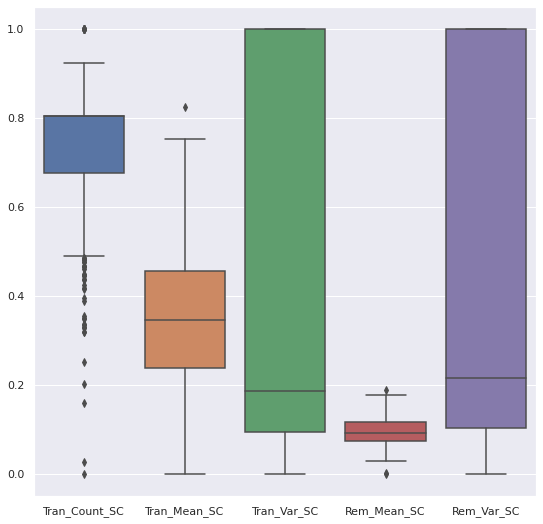

In [ ]:
sn.set(rc={'figure.figsize':(9,9)})
sn.boxplot(data=result[willing_col].drop(columns='total_active'));

###Save the result

In [ ]:
Path='/content/drive/MyDrive/MachineLearing/Negah_Data/Negah_Features_withoutOutliers.csv'
result.to_csv(Path)

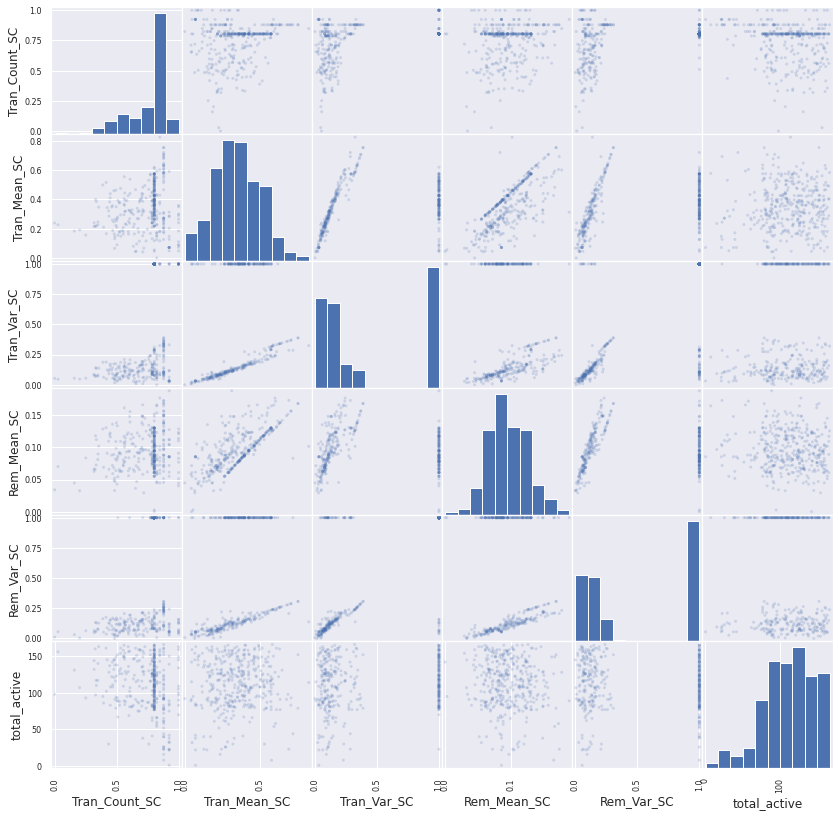

In [ ]:
sn.set(rc={'figure.figsize':(14,14)})
pd.plotting.scatter_matrix(result[willing_col], alpha=0.2);

# K_Means:

In [ ]:
from sklearn.cluster import KMeans


##K_Means with standardization:

In [ ]:
x=result[willing_col].copy()

In [ ]:
x.columns

Index(['Tran_Count_SC', 'Tran_Mean_SC', 'Tran_Var_SC', 'Rem_Mean_SC',
       'Rem_Var_SC', 'total_active'],
      dtype='object')


###Elbow Curve

In [ ]:
wcss=[]
for i in range(1,9):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

Text(0, 0.5, 'WCSS')

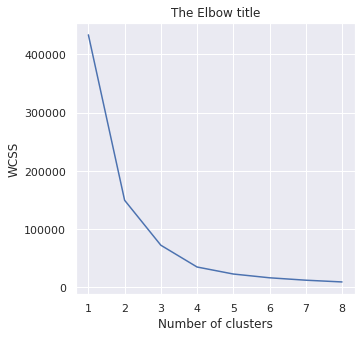

In [ ]:
plt.figure(figsize=[5,5])
number_clusters = range(1,9)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


###Kmean with n=6

In [ ]:
my_kmean=KMeans(6)

In [ ]:
my_kmean.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
Identified_Clusters=my_kmean.fit_predict(x)
# Identified_Clusters

In [ ]:
result_Cluster=result.copy()
result_Cluster['cluster']=Identified_Clusters

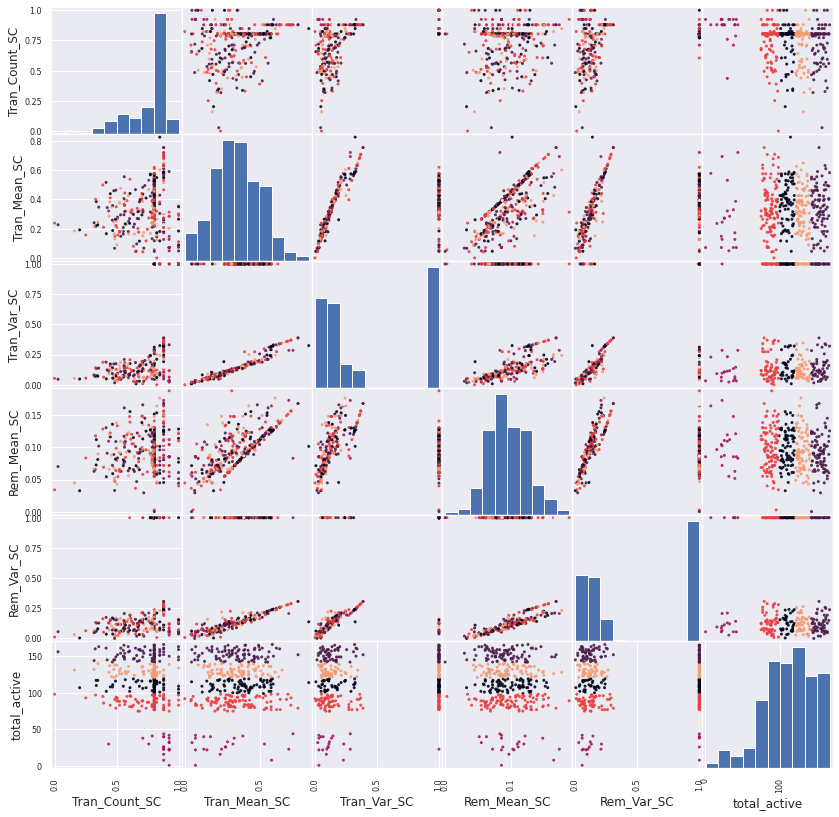

In [ ]:
sn.set(rc={'figure.figsize':(14,14)})
pd.plotting.scatter_matrix(result_Cluster[willing_col], alpha=0.9,c=result_Cluster['cluster']);


###Visulaizing clusters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

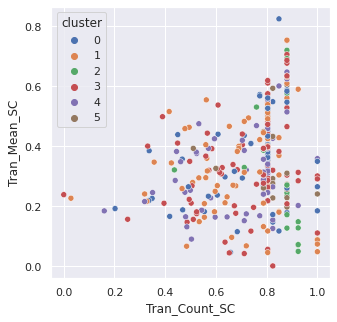

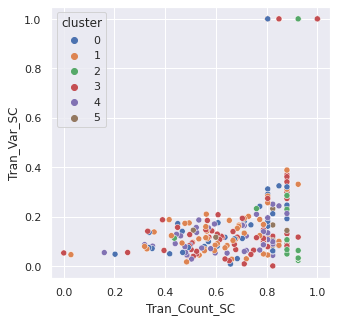

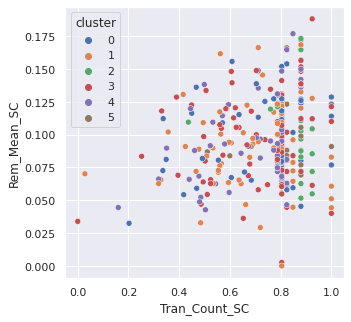

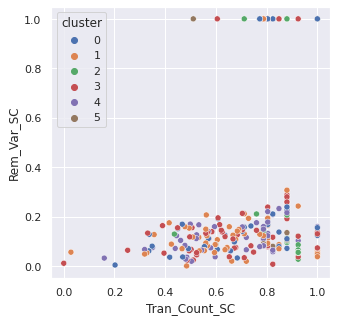

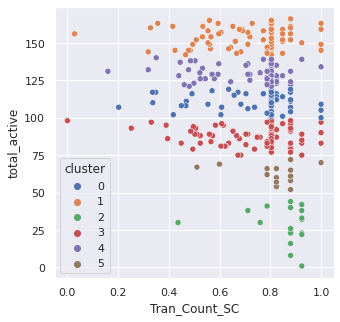

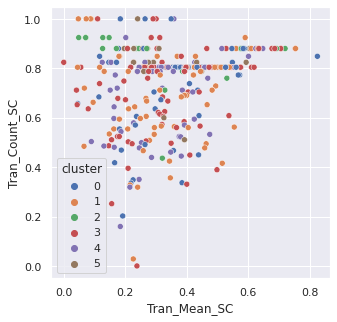

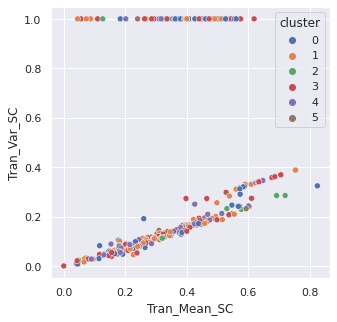

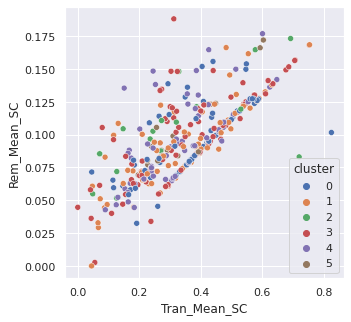

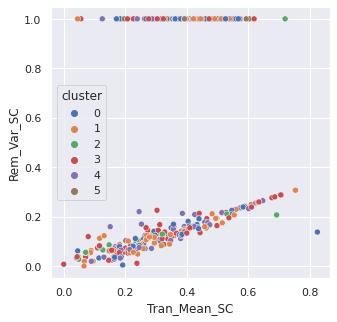

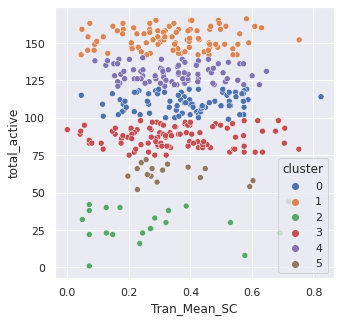

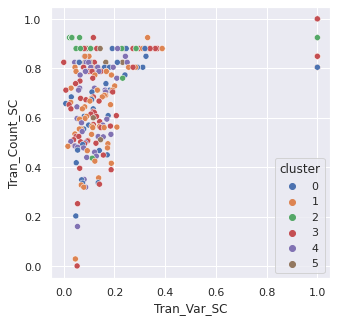

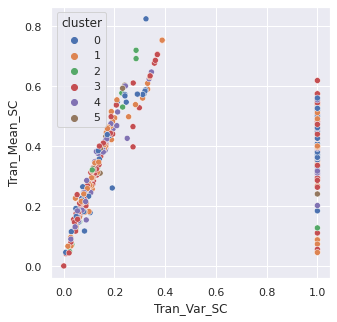

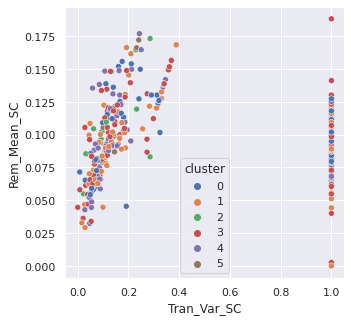

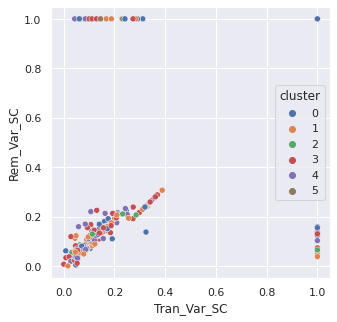

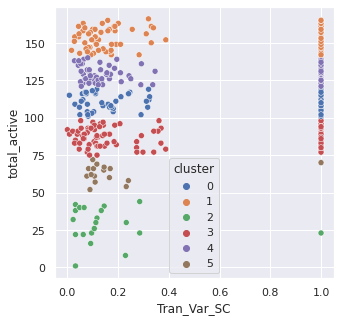

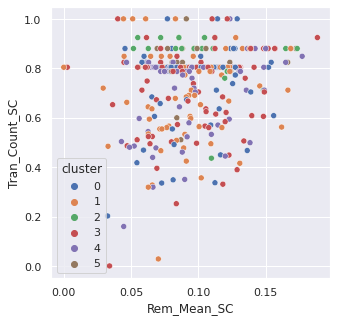

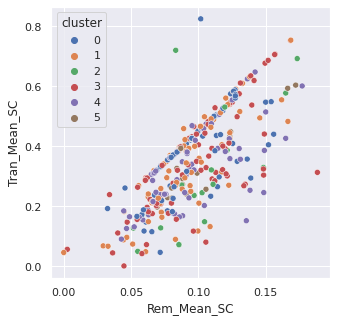

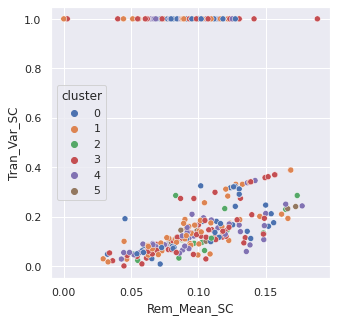

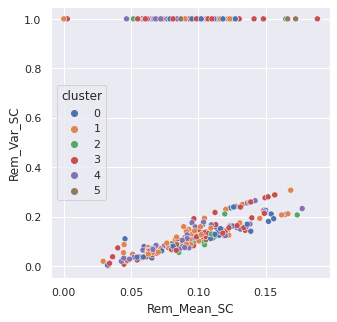

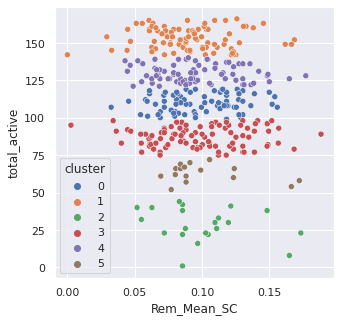

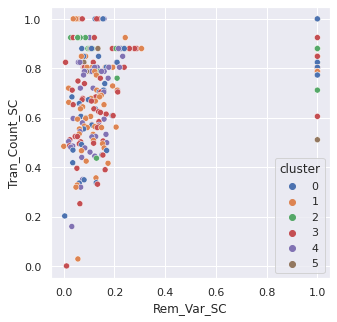

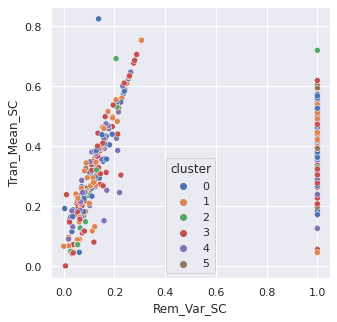

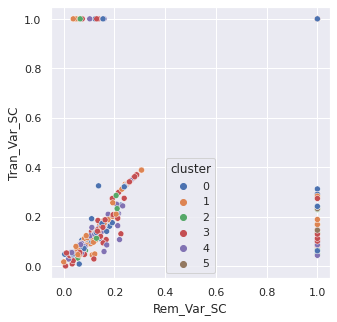

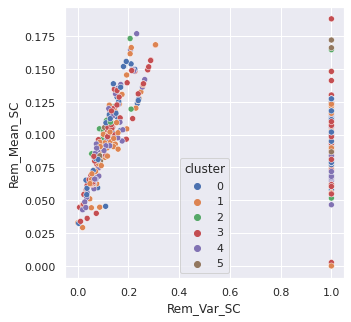

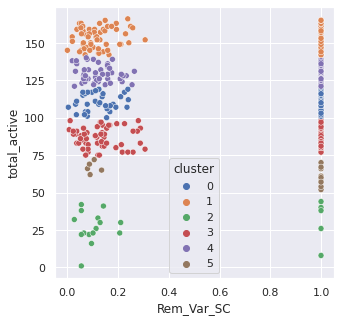

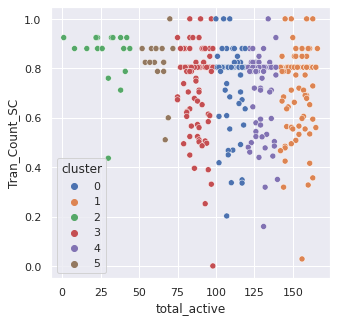

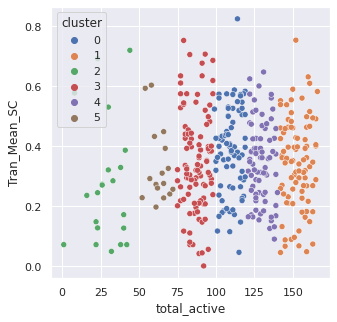

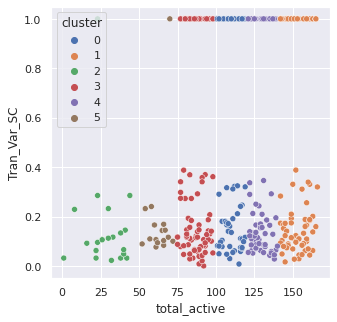

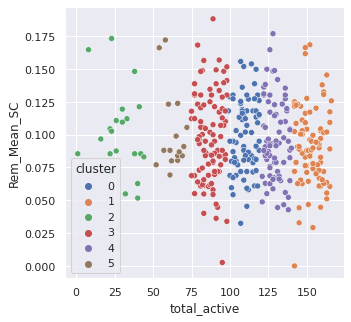

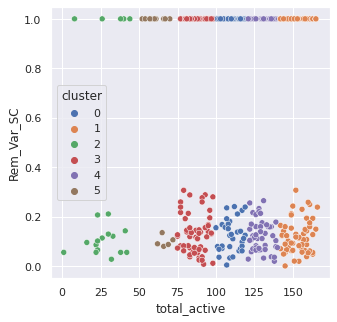

In [ ]:
sn.set(rc={'figure.figsize':(5,5)})

for xc in willing_col:
  for yc in willing_col:
    if xc!=yc:    
      plt.figure()
      sn.scatterplot(data=result_Cluster,x=xc,y=yc,hue='cluster',palette="deep")
    # plt.savefig('myfilename%03d.png'%(n))
    


##K_Means appendix clustering on cluster 0 and 2 datas

In [ ]:
result_Cluster.columns

Index(['ACC_NO', 'Tran_Count', 'Tran_Count_SC', 'Tran_Mean', 'Tran_Mean_SC',
       'Tran_Var', 'Tran_Var_SC', 'Rem_Mean', 'Rem_Mean_SC', 'total_active',
       'total_active_SC', 'Rem_Var', 'Rem_Var_SC', 'Rem_Mean_SC_Z',
       'Tran_Mean_SC_Z', 'cluster'],
      dtype='object')

In [ ]:
unwanted_col2=['ACC_NO', 'Tran_Count', 'TRAN_Mean',  'Tran_Var',
        'Rem_Mean',  'total_active', 'Rem_Var',
        'Rem_Mean_Z', 'Tran_Mean_SC_Z', 'Tran_Var_SC_Z',
       'cluster', 'total_active_SC']

In [ ]:
result_cluster02=result_Cluster.loc[(result_Cluster['cluster'].values==0) | (result_Cluster['cluster'].values==2)].copy()

In [ ]:
x=result_Cluster[willing_col].loc[(result_Cluster['cluster'].values==0) | (result_Cluster['cluster'].values==2)].copy()

In [ ]:
x.drop(columns=['Rem_Var_SC','Tran_Var_SC'],inplace=True)


###Elbow Curve

In [ ]:
wcss=[]
for i in range(1,12):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

Text(0, 0.5, 'WCSS')

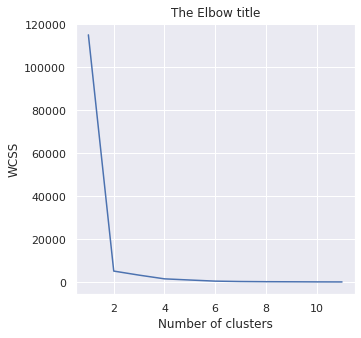

In [ ]:
plt.figure(figsize=[5,5])
number_clusters = range(1,12)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')



### we use n=3

In [ ]:
my_kmean=KMeans(3)

In [ ]:
my_kmean.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
Identified_Clusters=my_kmean.fit_predict(x)
# Identified_Clusters

In [ ]:

result_cluster02['cluster02']=Identified_Clusters


###Visulaizing clusters

In [ ]:
x.columns

Index(['Tran_Count_SC', 'Tran_Mean_SC', 'Rem_Mean_SC', 'total_active'], dtype='object')

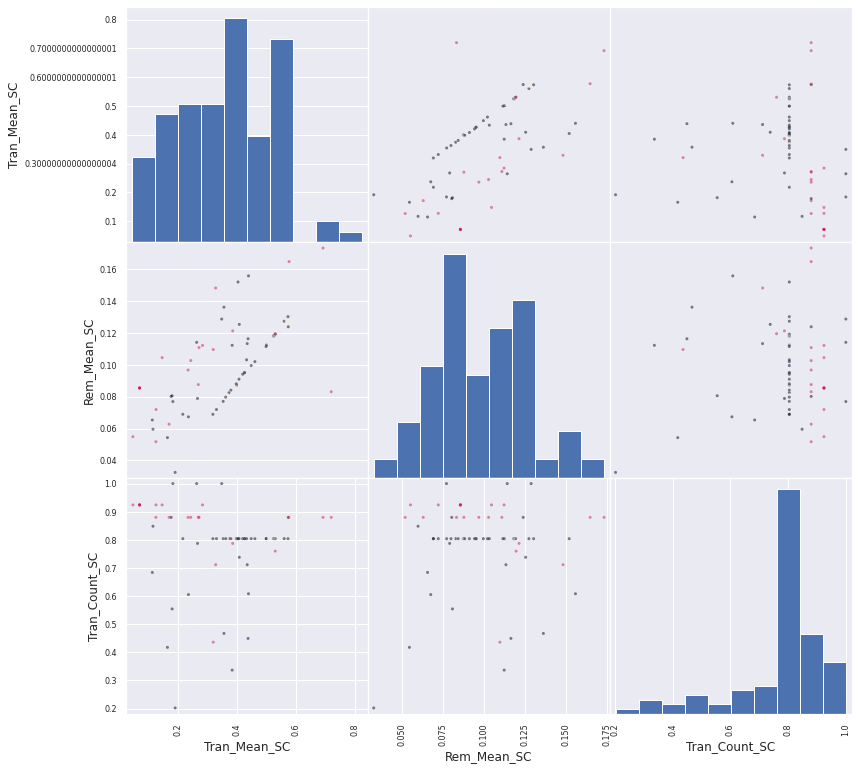

In [ ]:
sn.set(rc={'figure.figsize':(13,13)})
pd.plotting.scatter_matrix(result_cluster02[['Tran_Mean_SC', 'Rem_Mean_SC', 'Tran_Count_SC']],c=result_cluster02['cluster02']);

In [ ]:
result_cluster02.columns

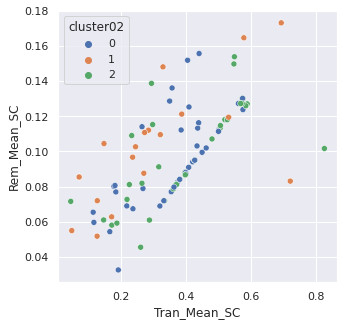

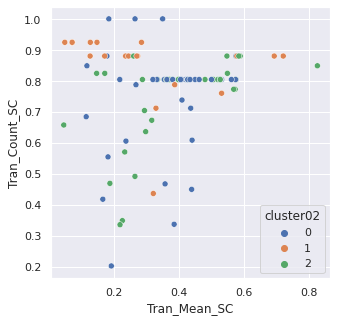

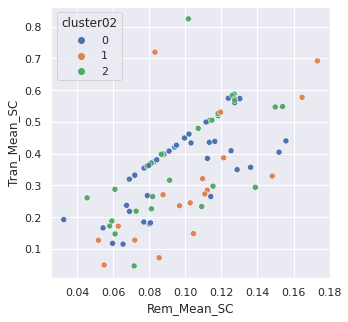

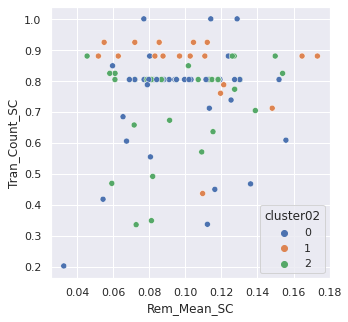

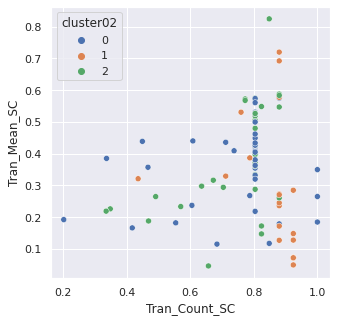

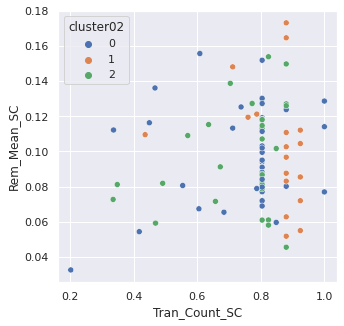

In [ ]:
sn.set(rc={'figure.figsize':(5,5)})

for xc in ['Tran_Mean_SC', 'Rem_Mean_SC', 'Tran_Count_SC']:
  for yc in ['Tran_Mean_SC', 'Rem_Mean_SC', 'Tran_Count_SC']:
    if xc!=yc:    
      plt.figure()
      sn.scatterplot(data=result_cluster02,x=xc,y=yc,hue='cluster02',palette="deep")
    # plt.savefig('myfilename%03d.png'%(n))
    

In [ ]:
# sn.scatterplot(data=result_cluster02,x='Rem_Mean_SC',y='Tran_Mean_SC',size='Tran_Count_SC',hue='cluster02',palette='deep');

we see that clusters which are labeled with 0 represents these behaviors:

1.   large number of BAL_RLS 
2.   large amount of TRAN_AMT



from previous clustering we now that these represent longer active time
Therefore following customeres are valuable: 

In [ ]:
show_col=['Tran_Count','Tran_Mean','Rem_Mean','total_active']
# result[show_col].describe()

In [ ]:
result_cluster02[show_col][result_cluster02['cluster02']==6].describe()

,Tran_Count,Tran_Mean,Rem_Mean,total_active
count,4.000000,4.000000e+00,4.000000e+00,4.00
mean,46.750000,6.594419e+10,2.064349e+10,31.25
std,84.897487,1.311814e+11,4.078323e+10,1.50
min,2.000000,1.666016e+06,1.309502e+08,30.00
25%,2.000000,2.297460e+08,2.372830e+08,30.00
50%,5.500000,5.296637e+08,3.124161e+08,31.00
75%,50.250000,6.624410e+10,2.071862e+10,32.25
max,174.000000,2.627158e+11,8.181818e+10,33.00



##K_Means appendix clustering on datas which active_time is replaced with cluster labels.

In [ ]:
result_Cluster.columns

Index(['ACC_NO', 'Tran_Count', 'Tran_Count_SC', 'Tran_Mean', 'Tran_Mean_SC',
       'Tran_Var', 'Tran_Var_SC', 'Rem_Mean', 'Rem_Mean_SC', 'total_active',
       'total_active_SC', 'Rem_Var', 'Rem_Var_SC', 'Rem_Mean_SC_Z',
       'Tran_Mean_SC_Z', 'cluster'],
      dtype='object')

In [ ]:
unwanted_col2=['ACC_NO', 'Tran_Count', 'TRAN_Mean',  'Tran_Var',
        'Rem_Mean',  'total_active', 'Rem_Var',
        'Rem_Mean_Z', 'Tran_Mean_SC_Z', 'Tran_Var_SC_Z',
       'cluster', 'total_active_SC']

In [ ]:
willing_col2=['Tran_Count_SC', 'Tran_Mean_SC',
        'Tran_Var_SC',  'Rem_Mean_SC', 'Rem_Var_SC','cluster']

In [ ]:
x=result_Cluster[willing_col2].loc[(result_Cluster['cluster'].values==0) | (result_Cluster['cluster'].values==2)].copy()

In [ ]:
# x.drop(columns=['Rem_Var_SC','Tran_Var_SC'],inplace=True)


###Elbow Curve

In [ ]:
wcss=[]
for i in range(1,12):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

Text(0, 0.5, 'WCSS')

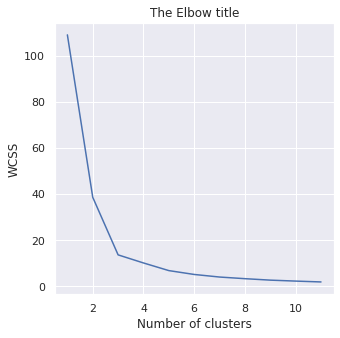

In [ ]:
plt.figure(figsize=[5,5])
number_clusters = range(1,12)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')



### we use n=4

In [ ]:
my_kmean=KMeans(4)

In [ ]:
my_kmean.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
Identified_Clusters=my_kmean.fit_predict(x)
# Identified_Clusters

In [ ]:

x['cluster_timeClustered']=Identified_Clusters
# result_cluster02['cluster02']=Identified_Clusters


###Visulaizing clusters

In [ ]:
x.columns

Index(['Tran_Count_SC', 'Tran_Mean_SC', 'Tran_Var_SC', 'Rem_Mean_SC',
       'Rem_Var_SC', 'cluster', 'cluster_timeClustered'],
      dtype='object')

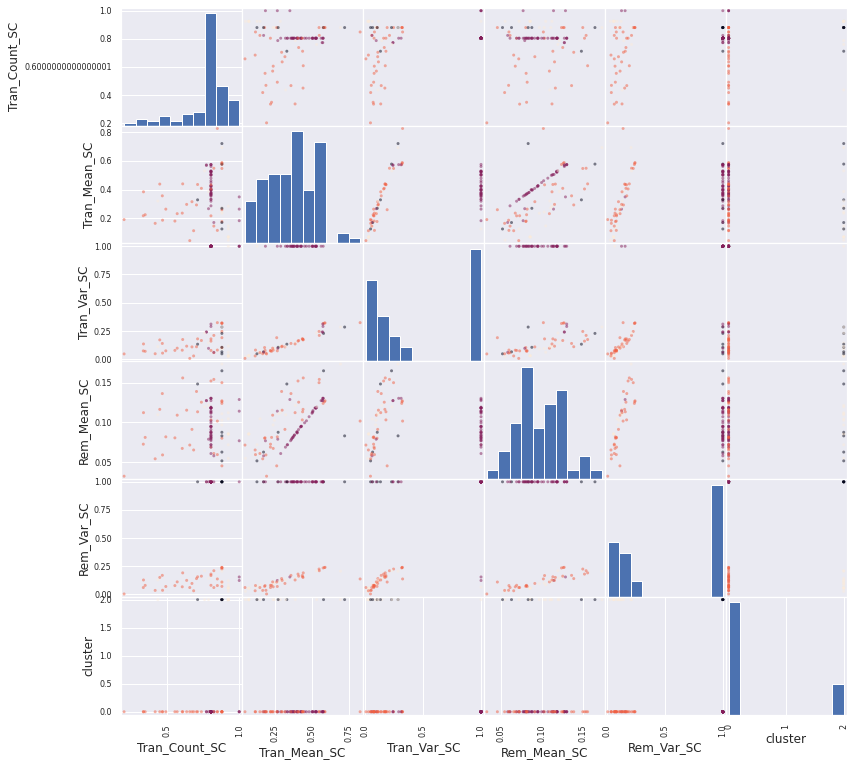

In [ ]:
sn.set(rc={'figure.figsize':(13,13)})
pd.plotting.scatter_matrix(x.drop(columns='cluster_timeClustered'),c=x['cluster_timeClustered']);

In [ ]:
willing_col2=['Tran_Count_SC', 'Tran_Mean_SC', 'Tran_Var_SC', 'Rem_Mean_SC',
       'Rem_Var_SC']

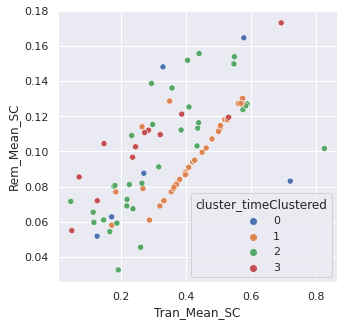

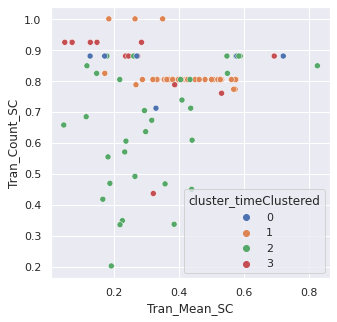

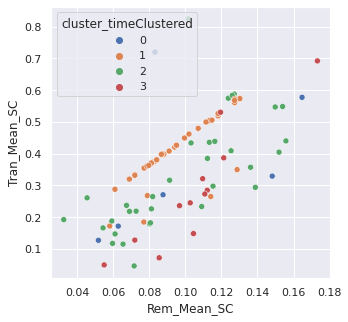

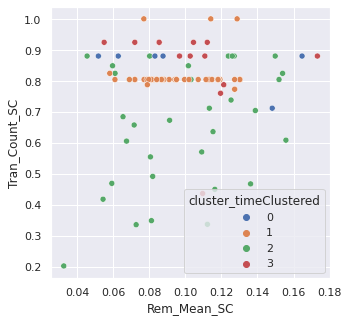

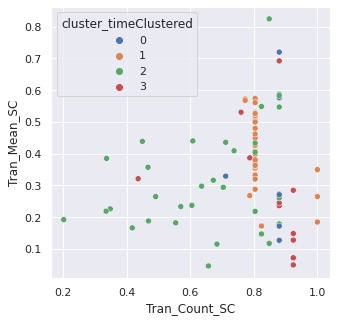

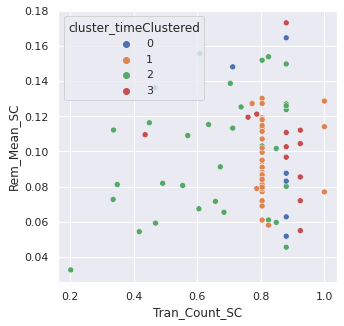

In [ ]:
sn.set(rc={'figure.figsize':(5,5)})

for xc in ['Tran_Mean_SC', 'Rem_Mean_SC', 'Tran_Count_SC']:
  for yc in ['Tran_Mean_SC', 'Rem_Mean_SC', 'Tran_Count_SC']:
    if xc!=yc:    
      plt.figure()
      sn.scatterplot(data=x,x=xc,y=yc,hue='cluster_timeClustered',palette="deep")
    # plt.savefig('myfilename%03d.png'%(n))
    

In [ ]:
# sn.scatterplot(data=result_cluster02,x='Rem_Mean_SC',y='Tran_Mean_SC',size='Tran_Count_SC',hue='cluster02',palette='deep');

we see that clusters which are labeled with 0 represents these behaviors:

1.   large number of BAL_RLS 
2.   large amount of TRAN_AMT



from previous clustering we now that these represent longer active time
Therefore following customeres are valuable: 

In [ ]:
show_col=['Tran_Count','Tran_Mean','Rem_Mean','total_active']
# result[show_col].describe()

In [ ]:
result_cluster02[show_col][result_cluster02['cluster02']==6].describe()

,Tran_Count,Tran_Mean,Rem_Mean,total_active
count,4.000000,4.000000e+00,4.000000e+00,4.00
mean,46.750000,6.594419e+10,2.064349e+10,31.25
std,84.897487,1.311814e+11,4.078323e+10,1.50
min,2.000000,1.666016e+06,1.309502e+08,30.00
25%,2.000000,2.297460e+08,2.372830e+08,30.00
50%,5.500000,5.296637e+08,3.124161e+08,31.00
75%,50.250000,6.624410e+10,2.071862e+10,32.25
max,174.000000,2.627158e+11,8.181818e+10,33.00


#DBSCAN

##DBSCAN with all features

In [ ]:
# Path='/content/drive/MyDrive/MachineLearing/Negah_Data/Negah_Features_withoutOutliers.csv'

In [ ]:
# result=pd.read_csv(Path)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
result.columns

Index(['ACC_NO', 'Tran_Count', 'Tran_Count_SC', 'Tran_Mean', 'Tran_Mean_SC',
       'Tran_Var', 'Tran_Var_SC', 'Rem_Mean', 'Rem_Mean_SC', 'total_active',
       'total_active_SC', 'Rem_Var', 'Rem_Var_SC', 'Rem_Mean_SC_Z',
       'Tran_Mean_SC_Z'],
      dtype='object')

In [ ]:
willing_Cols=['Tran_Count_SC', 
       'Tran_Mean_SC', 'Tran_Var_SC', 'Rem_Mean_SC',
       'total_active_SC', 'Rem_Var_SC']

In [ ]:
x=result[willing_Cols].copy()

In [ ]:
dbscan = DBSCAN()

In [ ]:
dbscan.fit_predict(x)

In [ ]:
x['cluster']=dbscan.labels_ 

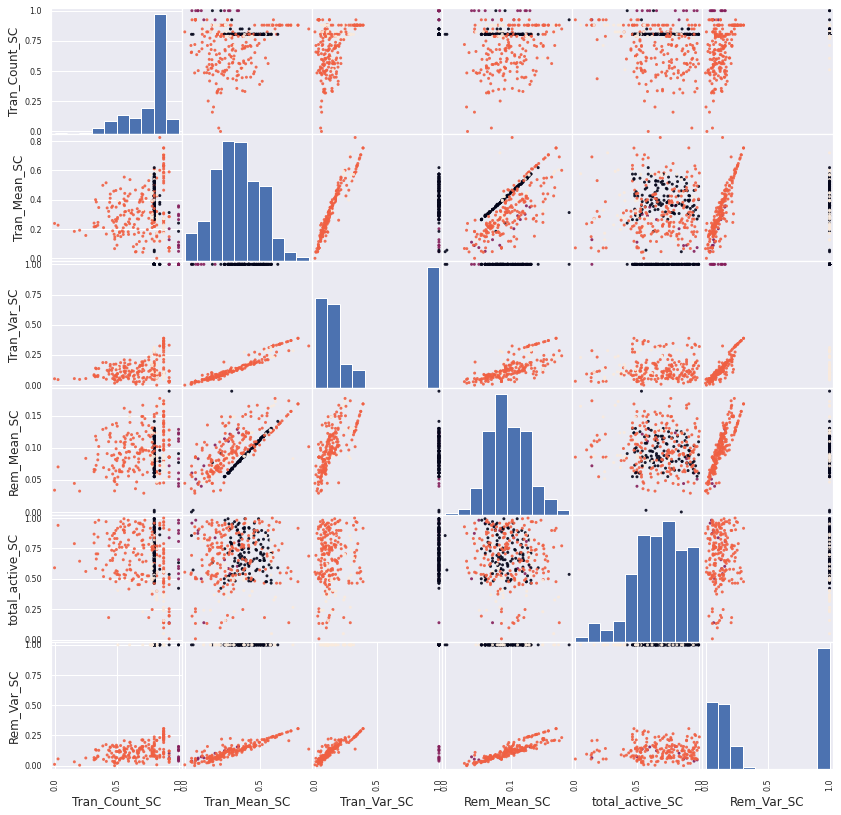

In [ ]:
sn.set(rc={'figure.figsize':(14,14)})
pd.plotting.scatter_matrix(x[willing_Cols], alpha=0.9,c=x['cluster']);

##DBSCAN with parameters selected

In [ ]:
result.columns

Index(['ACC_NO', 'Tran_Count', 'Tran_Count_SC', 'Tran_Mean', 'Tran_Mean_SC',
       'Tran_Var', 'Tran_Var_SC', 'Rem_Mean', 'Rem_Mean_SC', 'total_active',
       'total_active_SC', 'Rem_Var', 'Rem_Var_SC', 'Rem_Mean_SC_Z',
       'Tran_Mean_SC_Z'],
      dtype='object')

In [ ]:
willing_Cols=['Tran_Count_SC', 'Rem_Var_SC','Tran_Var_SC',
       'Tran_Mean_SC',  'Rem_Mean_SC',
       'total_active_SC']

In [ ]:
x=result[willing_Cols].copy()

In [ ]:
dbscan = DBSCAN(eps=.3, min_samples=3)

In [ ]:
dbscan.fit_predict(x);

In [ ]:
x['cluster']=dbscan.labels_ 

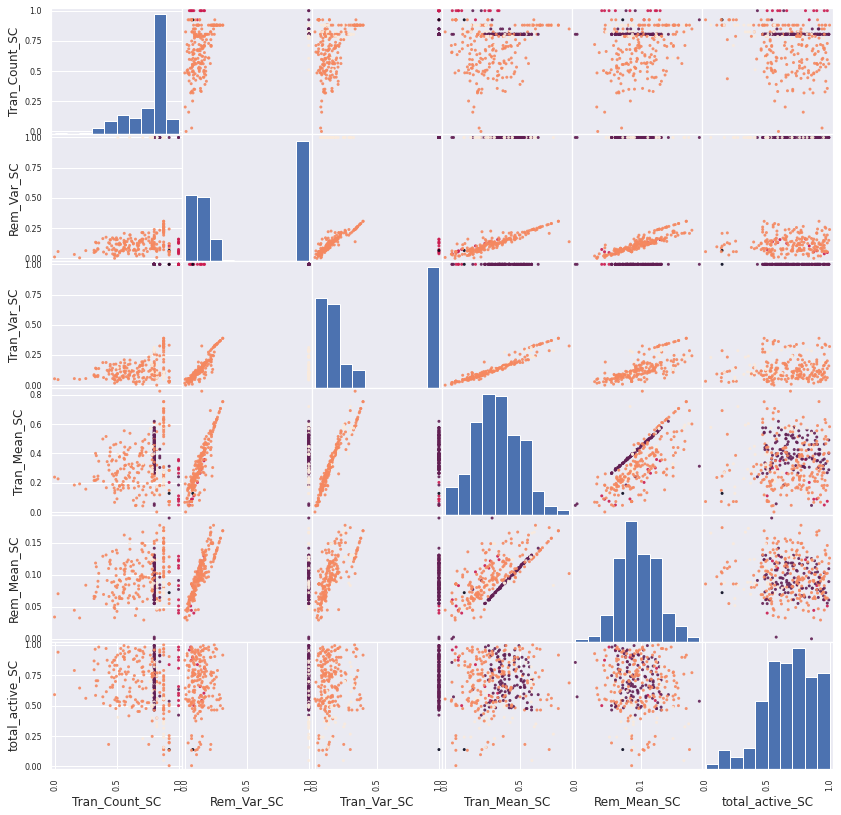

In [ ]:
sn.set(rc={'figure.figsize':(14,14)})
pd.plotting.scatter_matrix(x[willing_Cols], alpha=0.9,c=x['cluster']);

##DBSCAN with parameters selected

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

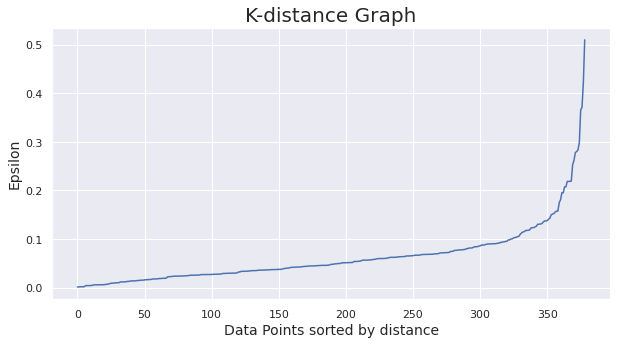

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=[10,5])
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
x.columns

Index(['Tran_Count_SC', 'Rem_Var_SC', 'Tran_Var_SC', 'Tran_Mean_SC',
       'Rem_Mean_SC', 'total_active_SC'],
      dtype='object')

In [ ]:
willing_Cols=['Tran_Count_SC', 'Rem_Var_SC','Tran_Var_SC',
       'Tran_Mean_SC',  'Rem_Mean_SC',
       'total_active_SC']

In [ ]:
x=result[willing_Cols].copy()

In [ ]:
dbscan = DBSCAN(eps=.17, min_samples=5)

In [ ]:
dbscan.fit_predict(x);

In [ ]:
x['cluster']=dbscan.labels_ 

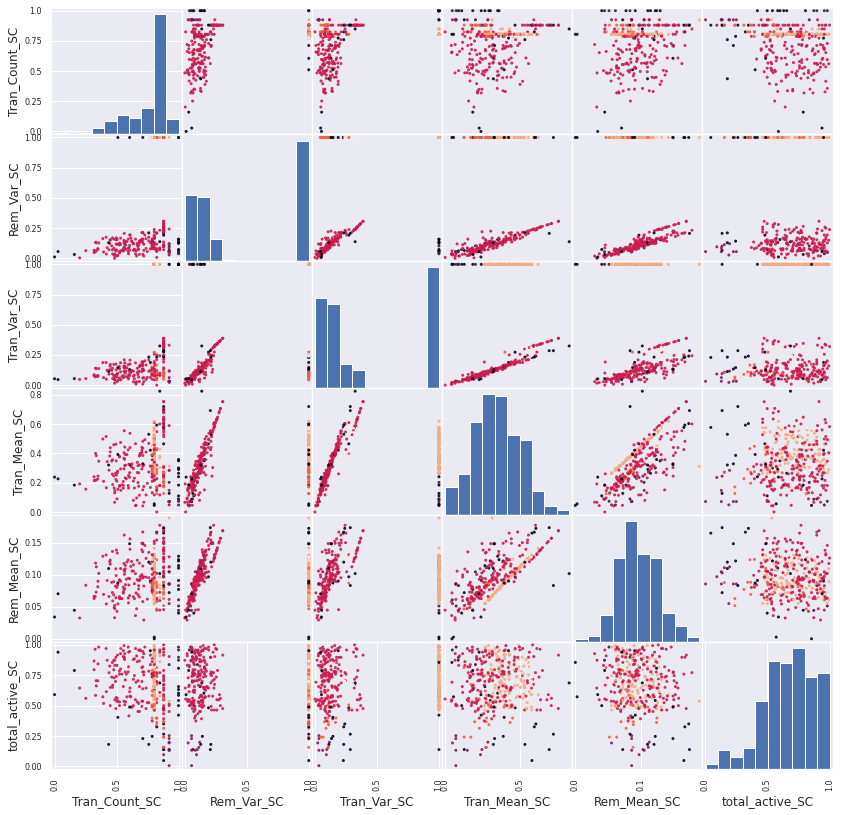

In [ ]:
sn.set(rc={'figure.figsize':(14,14)})
pd.plotting.scatter_matrix(x[willing_Cols], alpha=0.9,c=x['cluster']);